# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [14]:
renda.drop(['index'], axis=1, inplace=True)
renda.drop(['Unnamed: 0'], axis=1, inplace=True)

In [35]:
renda_encoded = renda[['tempo_emprego', 'renda','qtd_filhos', 'idade', 'tipo_renda', 'qt_pessoas_residencia']]
renda_encoded.head()

,tempo_emprego,renda,qtd_filhos,idade,tipo_renda,qt_pessoas_residencia
0,3.575342,3369.24,1,36,Assalariado,3.0
1,0.860274,6096.14,0,42,Empresário,2.0
2,8.065753,5658.98,2,31,Assalariado,4.0
3,1.208219,7246.69,0,50,Empresário,2.0
4,13.873973,4017.37,0,52,Assalariado,2.0


C:\Users\Caio\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


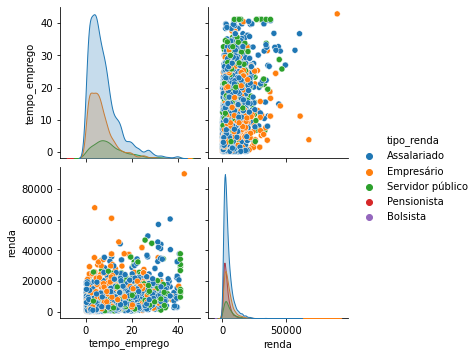

In [27]:
sns.pairplot(renda_encoded, hue='tipo_renda')

In [36]:
renda_encoded.corr()

,tempo_emprego,renda,qtd_filhos,idade,qt_pessoas_residencia
tempo_emprego,1.000000,0.394235,-0.074250,0.323934,-0.065748
renda,0.394235,1.000000,0.009567,0.042570,0.020977
qtd_filhos,-0.074250,0.009567,1.000000,-0.364303,0.896488
idade,0.323934,0.042570,-0.364303,1.000000,-0.338805
qt_pessoas_residencia,-0.065748,0.020977,0.896488,-0.338805,1.000000


#### A escolha apenas das variáveis tempo_emprego e tipo_renda  pois na minha visão, são as que mais estão diretamente ligadas a renda. Pode se pereceber que o empresário mesmo com menos tempo de emprego, possui uma renda muito superior ao restante.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

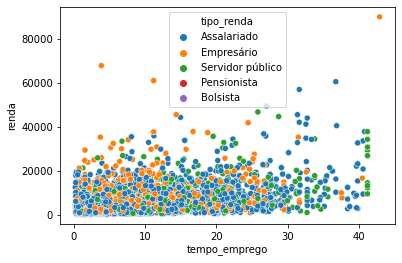

In [32]:
sns.scatterplot(x ='tempo_emprego', y='renda', hue='tipo_renda',data=renda_encoded)

<AxesSubplot:xlabel='idade', ylabel='renda'>

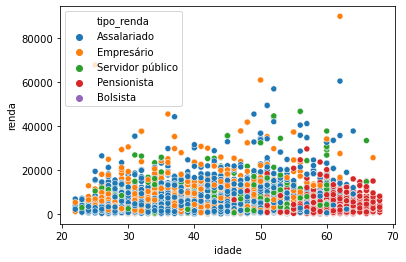

In [34]:
sns.scatterplot(x ='idade', y='renda', hue='tipo_renda',data=renda)

3) Na sua aopinião, há outliers na variável renda?

### A maioria dos outliers tem as cores laranjas e azuis, ou seja, um empresário melhor sucedido, um assalariado com um cargo de diretor, acho que faz sentido esses dados

4) Calcule o logaritmo da variável renda e repita a sequência de análise

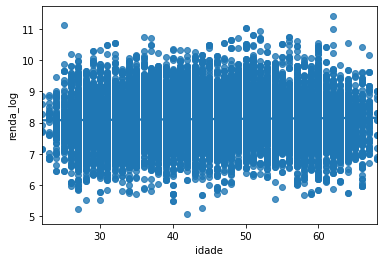

In [45]:
renda_log = renda_encoded.copy()
renda_log['renda_log'] = np.log(renda_log['renda'])

_ = sns.regplot(x='idade', y='renda_log', data=renda_log)

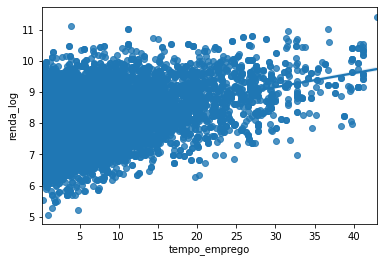

In [47]:
_ = sns.regplot(x='tempo_emprego', y='renda_log', data=renda_log)

In [46]:
renda_log.corr()

,tempo_emprego,renda,qtd_filhos,idade,qt_pessoas_residencia,renda_log
tempo_emprego,1.000000,0.394235,-0.074250,0.323934,-0.065748,0.379556
renda,0.394235,1.000000,0.009567,0.042570,0.020977,0.835734
qtd_filhos,-0.074250,0.009567,1.000000,-0.364303,0.896488,0.023743
idade,0.323934,0.042570,-0.364303,1.000000,-0.338805,0.024712
qt_pessoas_residencia,-0.065748,0.020977,0.896488,-0.338805,1.000000,0.036267
renda_log,0.379556,0.835734,0.023743,0.024712,0.036267,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

##### É possível notar, no caso do tempo_emprego, que quanto menor for, mais pontos no gráfico. Os outliers também diminuiram bastante, acredito que tenha melhorado a análise, quanto maior o tempo_emprego, tende-se a maior renda.